# 손실함수(Loss Function)

In [1]:
import numpy as np
import pandas as pd

In [2]:
y = np.array([0, 1, 0, 0])
yhat1 = np.array([.1, .7, .2, 0])
yhat2 = np.array([.1, .2, .7, 0])
N = y.size

## 평균제곱오차(MSE)

In [4]:
mse1 = np.sum(np.square(yhat1 - y)) / N
mse2 = np.sum(np.square(yhat2 - y)) / N

mse1, mse2

(0.03500000000000001, 0.28500000000000003)

## 평균 제곱근 오차(RMSE : Root)

In [6]:
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)

rmse1, rmse2

(0.18708286933869708, 0.5338539126015656)

## 평균 절대 오차 (MAE : Mean Absolute Error)

In [8]:
mae1 = np.sum(np.abs(yhat1 - y)) / N
mae2 = np.sum(np.abs(yhat2 - y)) / N
mae1, mae2

(0.15000000000000002, 0.4)

## Categorical CrossEntropy

In [15]:
def cross_entropy_error(yhat, yt):
    if yhat.ndim == 1 : 
        yhat = yhat.reshape(1, -1)
        yt = yt.reshape(1, -1)
    if yhat.size == yt.size:
        yt = yt.argmax(axis = 1)  # 몇 번째 값이 가장 큰지 알려줌
    batch_size = yhat.shape[0]
    return -np.sum(np.log(yhat[np.arange(batch_size), yt])) / batch_size

In [16]:
cce1 = cross_entropy_error(yhat1, y)
cce2 = cross_entropy_error(yhat2, y)
cce1 , cce2

(0.35667494393873245, 1.6094379124341003)

## Binary Cross Entropy

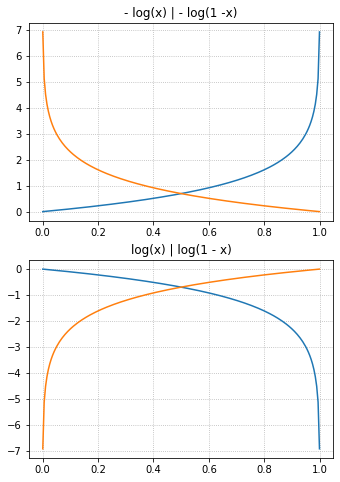

In [22]:
import matplotlib.pyplot as plt

xs = np.linspace(0.001, 0.999, 200)
plt.figure(figsize = (12, 8))
plt.subplot(221)
plt.plot(xs, - np.log(1 - xs))
plt.plot(xs, -np.log(xs)), plt.title('- log(x) | - log(1 -x)'), plt.grid(linestyle = ':')
plt.subplot(223)
plt.plot(xs, np.log(1 -xs))
plt.plot(xs, np.log(xs)), plt.title('log(x) | log(1 - x)'), plt.grid(linestyle = ':')

plt.show()

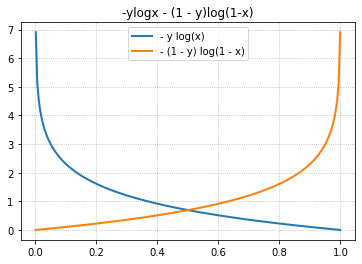

In [28]:
# -ylogx - (1 - y)log(1-x)
plt.plot(xs, -np.log(xs), lw = 2, label = "- y log(x)")               # y = 0일 때
plt.plot(xs, -np.log(1 - xs), lw = 2, label = "- (1 - y) log(1 - x)") # y = 1일 때
plt.title('-ylogx - (1 - y)log(1-x)')
plt.grid(linestyle = ':')
plt.legend()
plt.show()